In [2]:
import torch
import random
import math
import torch.nn as nn
from torchvision.transforms import transforms
from datasets import load_dataset
from dataset_convert import FaceDetectionDataset 
from dataset_convert import AnchorGenerator 
import numpy as np

import matplotlib.image as imga
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [ ]:
def train(epochs:int,training_data , validation_data=None):
    extractor.train()
    topdown.train()
    classifier.train()
    bboxregression.train()
    optimizer = optim.Adam(list(extractor.parameters())+
                           list(topdown.parameters())+
                           list(classifier.parameters())+
                           list(bboxregression.parameters()), lr=learning_rate)
    loSS = {}
    for i in range (0,epochs):
        train_loss= 0
        for key, (image,bbox) in enumerate(training_data):
            epoch_loss = {}
            model_pred = forward(image.cuda())
            optimizer.zero_grad()
            ll = loss(model_pred, bbox)
            del image , model_pred , bbox

            train_loss+=ll
            if (key % 1 == 0):
                epoch_loss[key] = train_loss/10
                print(f"The avg loss for {key}th data is {train_loss/10}")
                train_loss = 0   
            if key == 4:
                    break
            ll.backward()
            optimizer.step()
            del ll
        loSS[i] = epoch_loss
        del epoch_loss
    return loSS


In [4]:
device = torch.device("cpu")
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [78]:
dataset = load_dataset("CUHK-CSE/wider_face")
anchors = AnchorGenerator()
# Convert to PyTorch format
train_dataset = dataset['train'].with_format("torch")
val_dataset = dataset['validation'].with_format("torch")
data = FaceDetectionDataset(train_dataset,anchors)
vali_data = FaceDetectionDataset(val_dataset,anchors)

In [79]:
def denormalize(tensor, mean, std):
    mean = torch.tensor(mean, device=tensor.device).view(-1, 1, 1)
    std = torch.tensor(std, device=tensor.device).view(-1, 1, 1)
    return ((tensor * std + mean)*255).numpy().astype(int)

def show(i):
    hj = denormalize(data[i][0],(0.485, 0.456, 0.406),(0.229, 0.224, 0.225)).transpose(1,2,0)
    print(train_dataset[i]['image'].shape)
    coords = train_dataset[i]['faces']['bbox']
    coords[:,0]=coords[:,0]*(640/1024)
    coords[:,1]=coords[:,1]*(640/train_dataset[i]['image'].shape[1])
    coords[:,2]=coords[:,2]*(640/1024)
    coords[:,3]=coords[:,3]*(640/train_dataset[i]['image'].shape[1])
    fig, ax = plt.subplots()
    ax.imshow(hj)
    for i in range (0,coords.shape[0]):
        patch = patches.Rectangle((coords[i,0],coords[i,1]),coords[i,2],coords[i,3],linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(patch)
        
    plt.show()

torch.Size([3, 681, 1024])


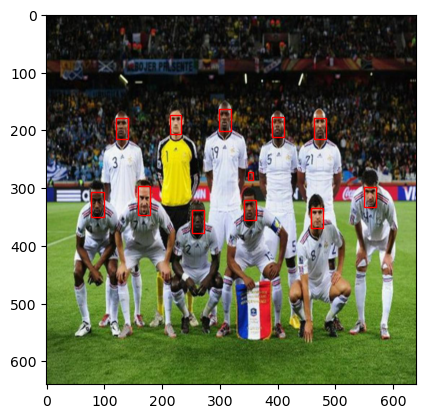

In [91]:
show(1311)

In [ ]:
# p=random.randint(0,12000)
def trans(p):
    coords = dataset2[p][1]["bbox"].numpy()*(640/1024)
    fig, ax = plt.subplots()

    img=dataset2[p][0].numpy().transpose(1,2,0)
    img_uint8 = (img * 255).astype(np.uint8)
    img_pil = Image.fromarray(img_uint8)
    img_resized = img_pil.resize((640, 640), Image.BILINEAR)
    img = np.array(img_resized)
    ax.imshow(img)
    for i in range (0,coords.shape[0]):
        patch = patches.Rectangle((coords[i,0],coords[i,1]),coords[i,2],coords[i,3],linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(patch)

        
    plt.show()
# p=2939
def org(p):
    coords = dataset4[p][1]["bbox"].numpy()
    fig, ax = plt.subplots()

    img=dataset4[p][0].numpy().transpose(1,2,0)
    ax.imshow(img)
    for i in range (0,coords.shape[0]):
        patch = patches.Rectangle((coords[i,0],coords[i,1]),coords[i,2],coords[i,3],linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(patch)

    plt.show()
def wo(p):
    img=dataset2[p][0].numpy().transpose(1,2,0)
    img_uint8 = (img * 255).astype(np.uint8)
    img_pil = Image.fromarray(img_uint8)
    img_resized = img_pil.resize((640, 640), Image.BILINEAR)
    img = np.array(img_resized)
    plt.imshow(img)


        
    plt.show()